In [97]:
#converting chronic absentee data from txt files to csv
#Chronic Absentee data: https://www.cde.ca.gov/ds/ad/filesabd.asp
#Chronic Absentee file description: https://www.cde.ca.gov/ds/ad/fsabd.asp
#from 2022 on, DASS column was added so remove for consistency 

df1 = pd.read_csv("chronicabsenteeism23.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df1 = df1.drop("DASS", axis='columns')
#Only want school based data
df1 = df1[df1['Aggregate Level'] == "S"]
#drop unused columns to make data scrollable
df1 = df1.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
#remove student privacy null data
df1 = df1[df1['ChronicAbsenteeismCount'] != '*']
df1.to_csv('chronicabsenteeism23.csv', index = None)

df2 = pd.read_csv("chronicabsenteeism22-v3.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df2 = df2.drop("DASS", axis='columns')
df2 = df2[df2['Aggregate Level'] == "S"]
df2 = df2.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
df2 = df2[df2['ChronicAbsenteeismCount'] != '*']
df2.to_csv('chronicabsenteeism22.csv', index = None)

df3 = pd.read_csv("chronicabsenteeism21.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df3 = df3[df3['Aggregate Level'] == "S"]
df3 = df3.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
df3 = df3.rename(columns={"ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df3 = df3[df3['ChronicAbsenteeismRate'].notnull()]
df3.to_csv('chronicabsenteeism21.csv', index = None)

df4 = pd.read_csv("chronicabsenteeism19.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df4 = df4[df4['AggregateLevel'] == "S"]
df4 = df4.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df4 = df4.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df4 = df4[df4['ChronicAbsenteeismRate'].notnull()]
df4.to_csv('chronicabsenteeism19.csv', index = None)

df5 = pd.read_csv("chronicabsenteeism18.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df5 = df5[df5['AggregateLevel'] == "S"]
df5 = df5.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df5 = df5.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df5 = df5[df5['ChronicAbsenteeismRate'].notnull()]
df5.to_csv('chronicabsenteeism18.csv', index = None)

df6 = pd.read_csv("chronicabsenteeism17.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df6 = df6[df6['AggregateLevel'] == "S"]
df6 = df6.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df6 = df6.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df6 = df6[df6['ChronicAbsenteeismRate'].notnull()]
df6.to_csv('chronicabsenteeism17.csv', index = None)

#Concatenate all Chronic Absentee data
dfAbsentee = pd.concat([df1,df2,df3,df4,df5,df6], ignore_index = True, sort = False)
dfAbsentee.to_csv('allChronicAbsentee.csv', index = None)

In [98]:
#All Absentee Data
#pull chronic absenteeism for 2021 by demographics
import pandas as pd

#allChronicAbsentee is already cleaned

dfAbsRAW = pd.read_csv("allChronicAbsentee.csv")
#trying to fix column dtype error ^ : , dtype={['4']: str, 'School Name': str}
dfAbsRAW = dfAbsRAW.drop(['District Name', 'ChronicAbsenteeismRate'], axis = 1)
dfAbsRAW = dfAbsRAW.sort_values(by=['Academic Year', 'School Name']).dropna()
#dfAbsRAW = dfAbsRAW[dfAbsRAW['ChronicAbsenteeismEligibleCumulativeEnrollment'] != "*"]
#dfAbsRAW = dfAbsRAW[dfAbsRAW['ChronicAbsenteeismCount'] != "*"]
dfAbsRAW


,Academic Year,School Name,Reporting Category,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount
761157,2016-17,21st Century Learning Institute,GF,70.0,30.0
761169,2016-17,21st Century Learning Institute,GM,63.0,28.0
761188,2016-17,21st Century Learning Institute,GR46,9.0,1.0
761194,2016-17,21st Century Learning Institute,GR78,16.0,4.0
761196,2016-17,21st Century Learning Institute,GR912,104.0,53.0
...,...,...,...,...,...
106147,2022-23,one.Charter,SE,141.0,36.0
106148,2022-23,one.Charter,SF,25.0,9.0
106149,2022-23,one.Charter,SH,80.0,29.0
106150,2022-23,one.Charter,SS,1287.0,361.0


In [99]:
demographicList = [
"RB",
"RI",
"RA",
"RF",
"RH",
"RD",
"RP",
"RT",
"RW",
"GM",
"GF",
"GX",
"SE",
"SD",
"SS",
"SM",
"SF",
"SH",
"GRKN",
"GR13",
"GR46",
"GR78",
"GRK8",
"GR912",
"TA"]

In [39]:
import numpy as np
#create a 2d array for storing summed demographic groups by year
#demoYearArray = [[0 for x in range(len(demographicList))] for y in range(len(dfAbsRAW['Academic Year'].unique().tolist()))]
demoYearArray = ([[0 for x in range(25)] for y in range(6)])

In 2016-17 with 77271.0 absent of a possible 378223.0 students, the chronic absentee rate of RB is:  0.2043001086660515
In 2016-17 with 4180.0 absent of a possible 16932.0 students, the chronic absentee rate of RI is:  0.2468698322702575
In 2016-17 with 20533.0 absent of a possible 567048.0 students, the chronic absentee rate of RA is:  0.03621033845459291
In 2016-17 with 6891.0 absent of a possible 141451.0 students, the chronic absentee rate of RF is:  0.048716516673618426
In 2016-17 with 452092.0 absent of a possible 3587697.0 students, the chronic absentee rate of RH is:  0.1260117562882261
In 2016-17 with 6993.0 absent of a possible 43752.0 students, the chronic absentee rate of RD is:  0.15983269336258915
In 2016-17 with 2666.0 absent of a possible 15286.0 students, the chronic absentee rate of RP is:  0.17440795499149547
In 2016-17 with 21738.0 absent of a possible 205782.0 students, the chronic absentee rate of RT is:  0.10563606146310173
In 2016-17 with 159499.0 absent of a po

C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2016-17 with 146333.0 absent of a possible 785549.0 students, the chronic absentee rate of SD is:  0.18628118678783884
In 2016-17 with 586903.0 absent of a possible 4071961.0 students, the chronic absentee rate of SS is:  0.14413276551519036
In 2016-17 with 4836.0 absent of a possible 52922.0 students, the chronic absentee rate of SM is:  0.09137976644873587
In 2016-17 with 12503.0 absent of a possible 45690.0 students, the chronic absentee rate of SF is:  0.273648500766032
In 2016-17 with 51093.0 absent of a possible 243466.0 students, the chronic absentee rate of SH is:  0.209856817789753
In 2016-17 with 0.0 absent of a possible 0.0 students, the chronic absentee rate of GRKN is:  nan
In 2016-17 with 125660.0 absent of a possible 1444990.0 students, the chronic absentee rate of GR13 is:  0.08696253953314556
In 2016-17 with 112851.0 absent of a possible 1496304.0 students, the chronic absentee rate of GR46 is:  0.07541983447213935


C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2016-17 with 96983.0 absent of a possible 989718.0 students, the chronic absentee rate of GR78 is:  0.09799053871910988
In 2016-17 with 421903.0 absent of a possible 4516830.0 students, the chronic absentee rate of GRK8 is:  0.09340688048919264
In 2016-17 with 346748.0 absent of a possible 2085645.0 students, the chronic absentee rate of GR912 is:  0.16625456393585678
In 2016-17 with 771561.0 absent of a possible 6610550.0 students, the chronic absentee rate of TA is:  0.11671661208220194


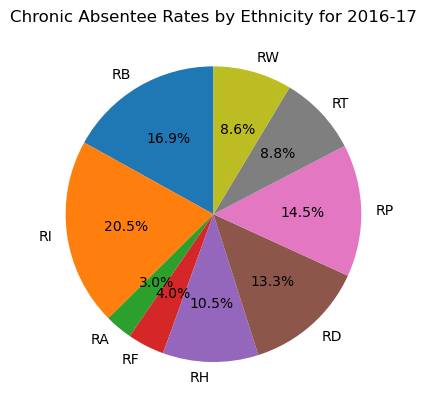

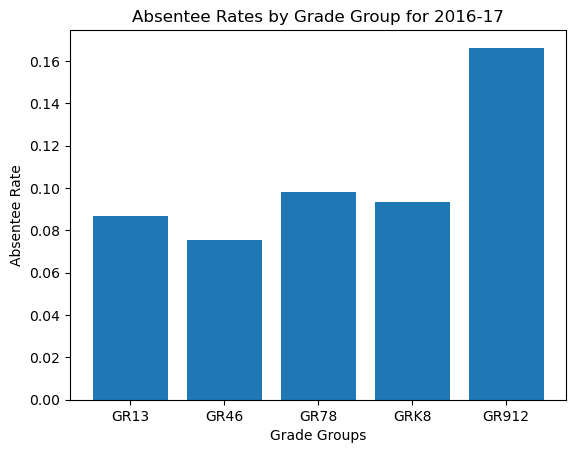

In 2017-18 with 79945.0 absent of a possible 369660.0 students, the chronic absentee rate of RB is:  0.21626629876102366
In 2017-18 with 3993.0 absent of a possible 17154.0 students, the chronic absentee rate of RI is:  0.23277369709688703
In 2017-18 with 22565.0 absent of a possible 576938.0 students, the chronic absentee rate of RA is:  0.039111654978524556
In 2017-18 with 7122.0 absent of a possible 139436.0 students, the chronic absentee rate of RF is:  0.05107719670673284
In 2017-18 with 467864.0 absent of a possible 3587852.0 students, the chronic absentee rate of RH is:  0.1304022573952326
In 2017-18 with 6989.0 absent of a possible 49680.0 students, the chronic absentee rate of RD is:  0.1406803542673108
In 2017-18 with 2816.0 absent of a possible 14726.0 students, the chronic absentee rate of RP is:  0.19122640228167867
In 2017-18 with 23622.0 absent of a possible 220007.0 students, the chronic absentee rate of RT is:  0.10736931097646893
In 2017-18 with 156863.0 absent of a p

C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2017-18 with 161151.0 absent of a possible 1372866.0 students, the chronic absentee rate of SE is:  0.11738290554212866
In 2017-18 with 154859.0 absent of a possible 812128.0 students, the chronic absentee rate of SD is:  0.19068299578391584
In 2017-18 with 624850.0 absent of a possible 4206889.0 students, the chronic absentee rate of SS is:  0.14853018465664294
In 2017-18 with 4371.0 absent of a possible 49550.0 students, the chronic absentee rate of SM is:  0.08821392532795157
In 2017-18 with 11104.0 absent of a possible 39407.0 students, the chronic absentee rate of SF is:  0.28177734920191844
In 2017-18 with 54224.0 absent of a possible 243103.0 students, the chronic absentee rate of SH is:  0.22304948931111504


C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2017-18 with 0.0 absent of a possible 0.0 students, the chronic absentee rate of GRKN is:  nan
In 2017-18 with 128236.0 absent of a possible 1435095.0 students, the chronic absentee rate of GR13 is:  0.08935715057191336
In 2017-18 with 118416.0 absent of a possible 1491312.0 students, the chronic absentee rate of GR46 is:  0.07940390743184525
In 2017-18 with 101619.0 absent of a possible 997175.0 students, the chronic absentee rate of GR78 is:  0.10190688695564971
In 2017-18 with 433939.0 absent of a possible 4499366.0 students, the chronic absentee rate of GRK8 is:  0.09644447684407093
In 2017-18 with 353579.0 absent of a possible 2092537.0 students, the chronic absentee rate of GR912 is:  0.1689714447104161
In 2017-18 with 791705.0 absent of a possible 6603087.0 students, the chronic absentee rate of TA is:  0.1198992228937768


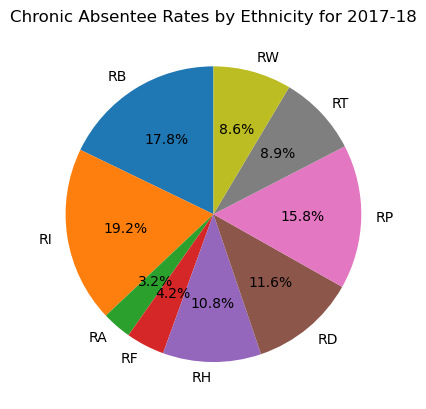

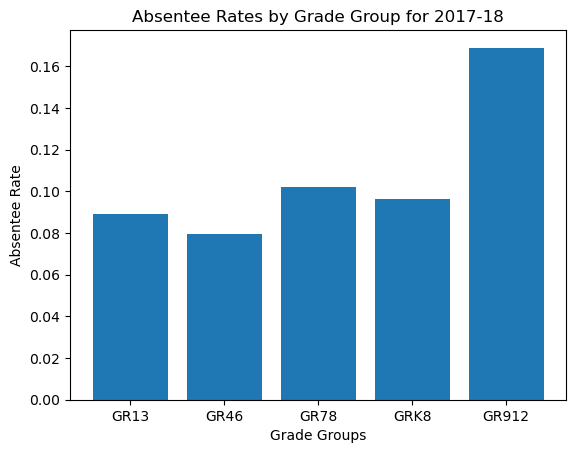

In 2018-19 with 85156.0 absent of a possible 354428.0 students, the chronic absentee rate of RB is:  0.24026318462423962
In 2018-19 with 3979.0 absent of a possible 15857.0 students, the chronic absentee rate of RI is:  0.2509301885602573
In 2018-19 with 25197.0 absent of a possible 578266.0 students, the chronic absentee rate of RA is:  0.043573372807669826
In 2018-19 with 8365.0 absent of a possible 135547.0 students, the chronic absentee rate of RF is:  0.06171291138866961
In 2018-19 with 508119.0 absent of a possible 3568404.0 students, the chronic absentee rate of RH is:  0.1423939105549708
In 2018-19 with 5425.0 absent of a possible 42838.0 students, the chronic absentee rate of RD is:  0.12663989915495588
In 2018-19 with 3206.0 absent of a possible 13831.0 students, the chronic absentee rate of RP is:  0.2317981346251175
In 2018-19 with 25844.0 absent of a possible 231163.0 students, the chronic absentee rate of RT is:  0.11179989877272747
In 2018-19 with 154591.0 absent of a po

C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2018-19 with 172494.0 absent of a possible 1315612.0 students, the chronic absentee rate of SE is:  0.13111312453823773
In 2018-19 with 167323.0 absent of a possible 833265.0 students, the chronic absentee rate of SD is:  0.20080406593340655
In 2018-19 with 659817.0 absent of a possible 4099005.0 students, the chronic absentee rate of SS is:  0.16097004029026557
In 2018-19 with 4101.0 absent of a possible 48584.0 students, the chronic absentee rate of SM is:  0.08441050551621933
In 2018-19 with 9124.0 absent of a possible 32628.0 students, the chronic absentee rate of SF is:  0.27963712149074416
In 2018-19 with 60622.0 absent of a possible 251208.0 students, the chronic absentee rate of SH is:  0.2413219324225343
In 2018-19 with 0.0 absent of a possible 0.0 students, the chronic absentee rate of GRKN is:  nan


C:\Users\matth\AppData\Local\Temp\ipykernel_25532\1467438836.py:22: RuntimeWarning: invalid value encountered in scalar divide
  absRateDemo = chronicAbsDemo/eligibleDemo


In 2018-19 with 143032.0 absent of a possible 1423617.0 students, the chronic absentee rate of GR13 is:  0.1004708429303668
In 2018-19 with 127820.0 absent of a possible 1439651.0 students, the chronic absentee rate of GR46 is:  0.08878540701878442
In 2018-19 with 111344.0 absent of a possible 1004424.0 students, the chronic absentee rate of GR78 is:  0.11085358374550987
In 2018-19 with 474031.0 absent of a possible 4431809.0 students, the chronic absentee rate of GRK8 is:  0.10696106262702205
In 2018-19 with 367023.0 absent of a possible 2088283.0 students, the chronic absentee rate of GR912 is:  0.17575347785716783
In 2018-19 with 841492.0 absent of a possible 6521056.0 students, the chronic absentee rate of TA is:  0.12904229008307858


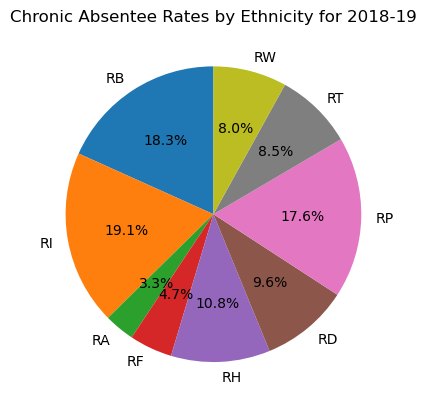

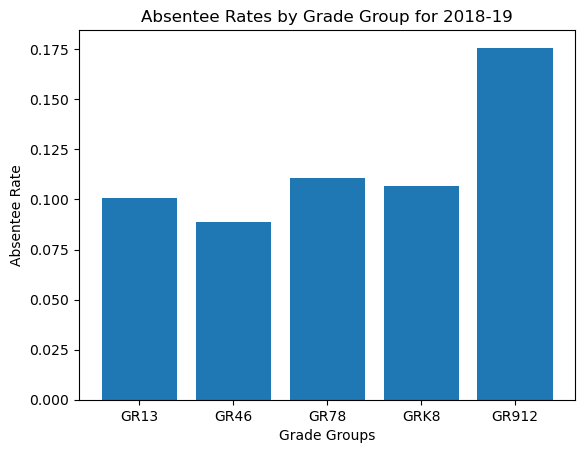

In 2020-21 with 85199.0 absent of a possible 310867.0 students, the chronic absentee rate of RB is:  0.2740689748348972
In 2020-21 with 4207.0 absent of a possible 13124.0 students, the chronic absentee rate of RI is:  0.3205577567814691
In 2020-21 with 21678.0 absent of a possible 573547.0 students, the chronic absentee rate of RA is:  0.037796379372571035
In 2020-21 with 4913.0 absent of a possible 126866.0 students, the chronic absentee rate of RF is:  0.03872589976825942
In 2020-21 with 599693.0 absent of a possible 3442598.0 students, the chronic absentee rate of RH is:  0.17419780061453588
In 2020-21 with 4945.0 absent of a possible 35700.0 students, the chronic absentee rate of RD is:  0.138515406162465
In 2020-21 with 2968.0 absent of a possible 11855.0 students, the chronic absentee rate of RP is:  0.25035849852382963
In 2020-21 with 25697.0 absent of a possible 242498.0 students, the chronic absentee rate of RT is:  0.10596788427121048
In 2020-21 with 139280.0 absent of a pos

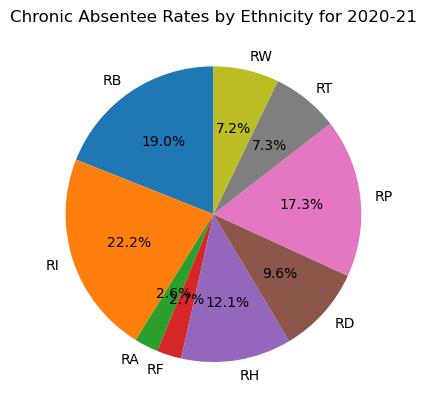

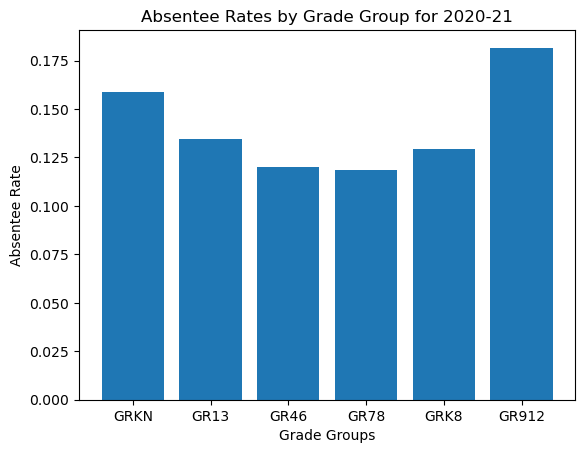

In 2021-22 with 138577.0 absent of a possible 317929.0 students, the chronic absentee rate of RB is:  0.4358740473501945
In 2021-22 with 6221.0 absent of a possible 12834.0 students, the chronic absentee rate of RI is:  0.48472806607448965
In 2021-22 with 65524.0 absent of a possible 573525.0 students, the chronic absentee rate of RA is:  0.11424785318861427
In 2021-22 with 18552.0 absent of a possible 123427.0 students, the chronic absentee rate of RF is:  0.1503074691923161
In 2021-22 with 1264217.0 absent of a possible 3511988.0 students, the chronic absentee rate of RH is:  0.3599719019541069
In 2021-22 with 14459.0 absent of a possible 49594.0 students, the chronic absentee rate of RD is:  0.2915473646005565
In 2021-22 with 5514.0 absent of a possible 11788.0 students, the chronic absentee rate of RP is:  0.4677638276213098
In 2021-22 with 61101.0 absent of a possible 251146.0 students, the chronic absentee rate of RT is:  0.2432887643044285
In 2021-22 with 307913.0 absent of a po

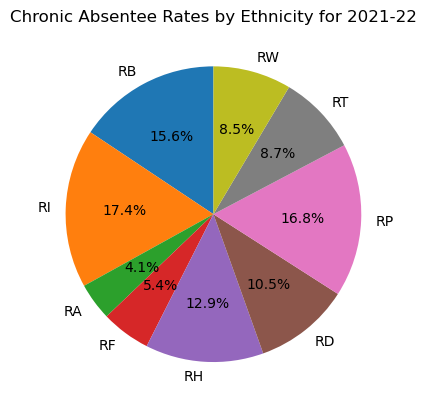

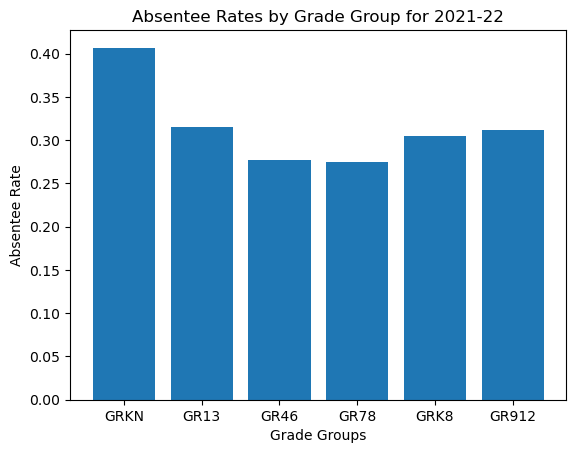

In 2022-23 with 117290.0 absent of a possible 309437.0 students, the chronic absentee rate of RB is:  0.3790432301243872
In 2022-23 with 4802.0 absent of a possible 11936.0 students, the chronic absentee rate of RI is:  0.4023123324396783
In 2022-23 with 58585.0 absent of a possible 574686.0 students, the chronic absentee rate of RA is:  0.10194262606014415
In 2022-23 with 15393.0 absent of a possible 118494.0 students, the chronic absentee rate of RF is:  0.12990531166134994
In 2022-23 with 1035269.0 absent of a possible 3491198.0 students, the chronic absentee rate of RH is:  0.2965368907750291
In 2022-23 with 11950.0 absent of a possible 49097.0 students, the chronic absentee rate of RD is:  0.24339572682648633
In 2022-23 with 4345.0 absent of a possible 11257.0 students, the chronic absentee rate of RP is:  0.3859820556098428
In 2022-23 with 54971.0 absent of a possible 257776.0 students, the chronic absentee rate of RT is:  0.2132510396623425
In 2022-23 with 253253.0 absent of a p

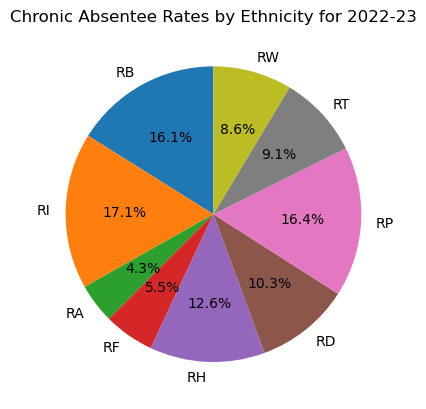

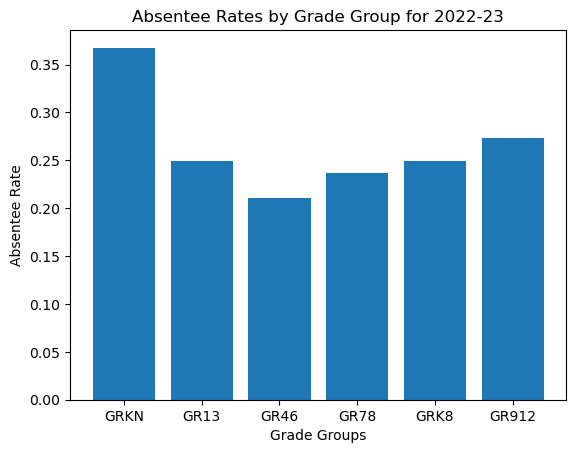

In [102]:
import matplotlib.pyplot as plt

yearnum = 0

#getting name of year from df
for year in dfAbsRAW['Academic Year'].unique().tolist():
    absRateDemoList = []
    demonum = 0
    #using demographic symbol in domgraphic list
    for demo in demographicList:
        #refine set to the current demographic
        dfAbsDemo = dfAbsRAW[dfAbsRAW['Reporting Category'] == demo].dropna()
        #refine that to the current year
        dfAbsDemoYear = dfAbsDemo[dfAbsDemo['Academic Year'] == year]
        #sum the eligible students of the set comprised of the demo and the year
        eligibleDemo = dfAbsDemoYear['ChronicAbsenteeismEligibleCumulativeEnrollment'].astype(float).sum()
        #sum the chronically absent students of the set comprised of the demo and the year
        chronicAbsDemo = dfAbsDemoYear['ChronicAbsenteeismCount'].astype(float).sum()
        #create the absentee rate for the demographic for the year
        absRateDemo = chronicAbsDemo/eligibleDemo
    
        #Add it to the list of all the demos for the year
        absRateDemoList.append(absRateDemo)

        #add the demo's absentee rate to the array row for that year
        demoYearArray[yearnum][demonum] = absRateDemo
        demonum += 1
    
        
        print("In", year, "with", chronicAbsDemo, "absent of a possible", eligibleDemo, "students, the chronic absentee rate of", demo, "is: ", absRateDemo)
    
    #print pie chart for ethnicities for that year
    plt.pie(absRateDemoList[0:9], labels = demographicList[0:9], autopct='%1.1f%%', startangle=90)
    titlep = "Chronic Absentee Rates by Ethnicity for " + str(year)
    plt.title(titlep) 
    plt.show()
    #plt.savefig(f'ChronAbsEthni{year}.png')

    #print bar graph for grade groups for that year
    categories = demographicList[18:24]
    values = absRateDemoList[18:24]

    plt.bar(categories, values)
    plt.xlabel('Grade Groups')
    plt.ylabel('Absentee Rate')
    titleb = "Absentee Rates by Grade Group for " + str(year)
    plt.title(titleb)
    plt.show()
    plt.savefig(f'ChronAbsGrade{year}.png')

    yearnum += 1

    
    

We have now created a matrix of absentee rates for all demographic groups for each year that record exist. We can use this to track absentees in demo groups through the years by calling demoYearArray[yearnum][demonum]

In [32]:
#use matrix to track changed over years for absentee totals
for x in range(6):
    print (demoYearArray[x][24])

0.11671661208220194
0.1198992228937768
0.12904229008307858
0.14648920130955498
0.3071930630191925
0.25733370297014363


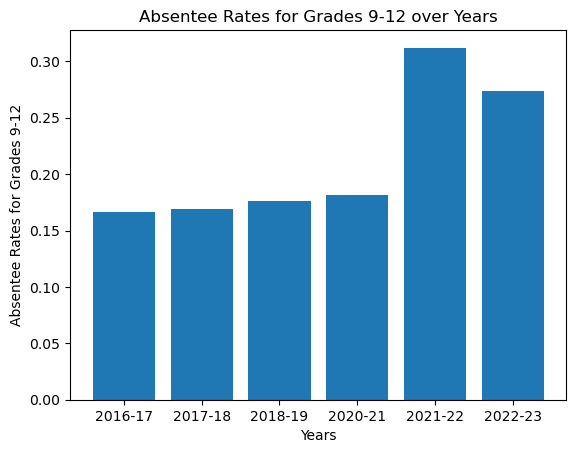

In [48]:
#graph absentee rates for Grades 9-12 over time
gr912AbsRates =[]
for x in range(6):
    gr912AbsRates.append(demoYearArray[x][23])
categories = dfAbsRAW['Academic Year'].unique().tolist()
values = gr912AbsRates

plt.bar(categories, values)

plt.xlabel('Years')
plt.ylabel('Absentee Rates for Grades 9-12')
plt.title('Absentee Rates for Grades 9-12 over Years')

plt.show()

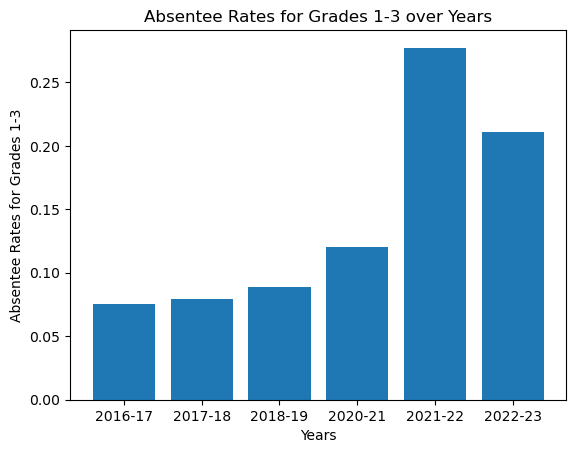

In [50]:
#graph absentee rates for Kindergarden over time
gr13AbsRates =[]
for x in range(6):
    gr13AbsRates.append(demoYearArray[x][20])
categories = dfAbsRAW['Academic Year'].unique().tolist()
values = gr13AbsRates

plt.bar(categories, values)

plt.xlabel('Years')
plt.ylabel('Absentee Rates for Grades 1-3')
plt.title('Absentee Rates for Grades 1-3 over Years')

plt.show()

RB


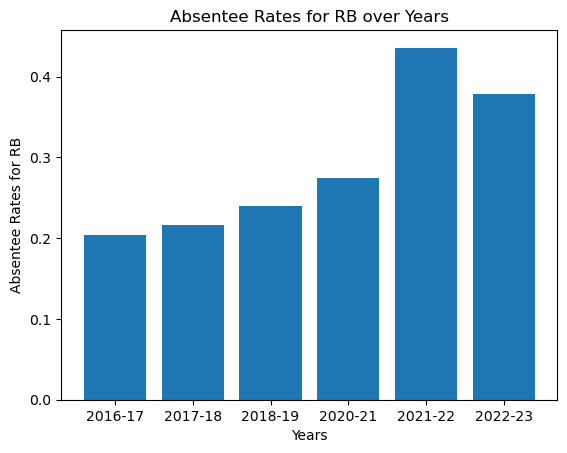

RI


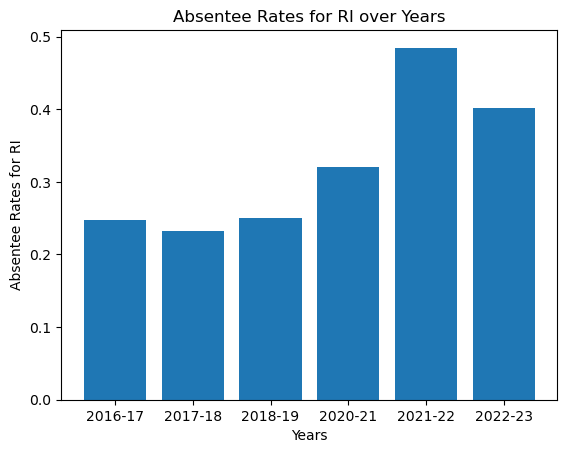

RA


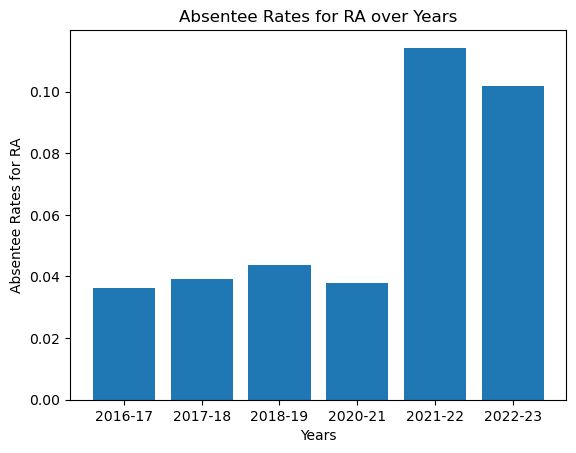

RF


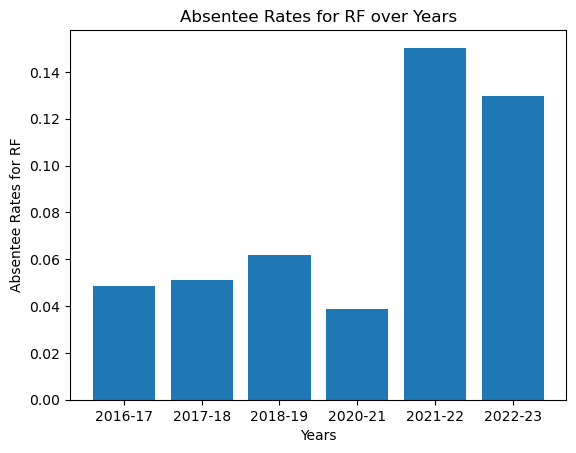

RH


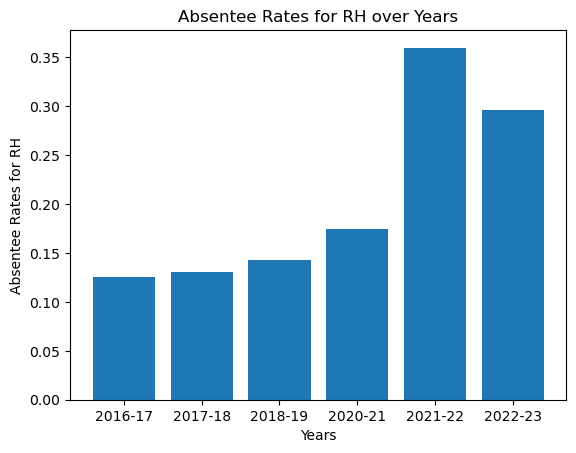

RD


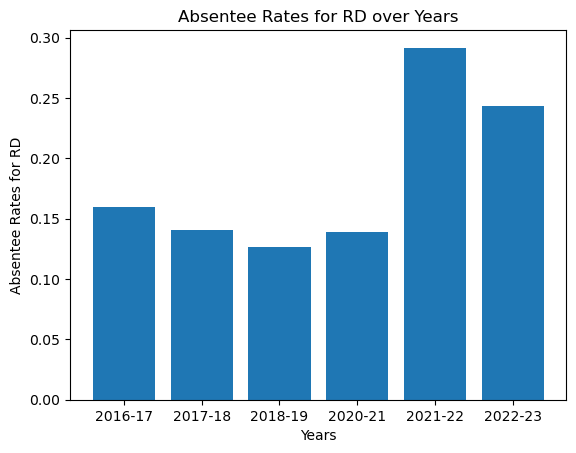

RP


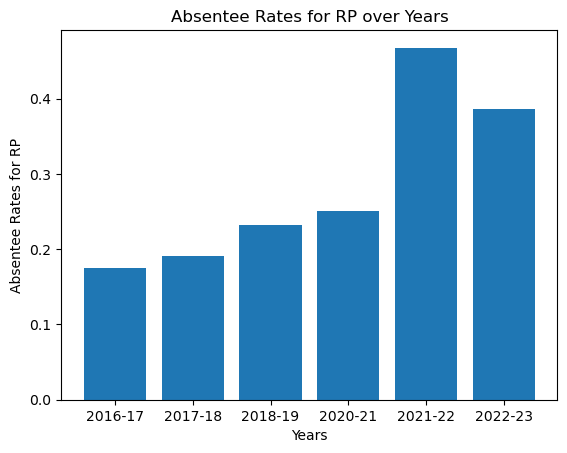

RT


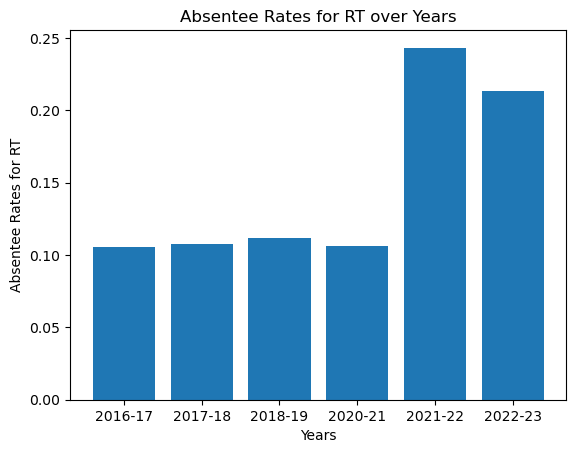

RW


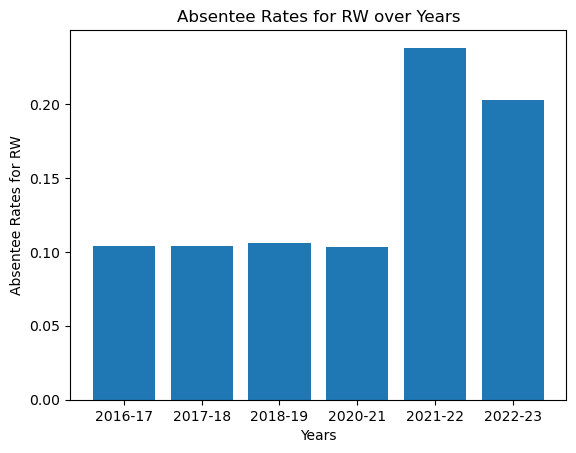

GM


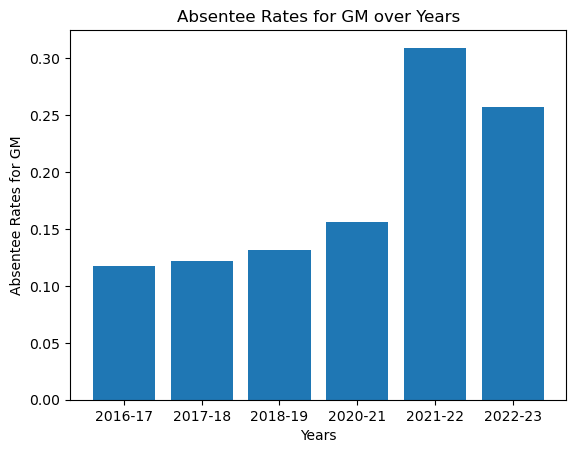

GF


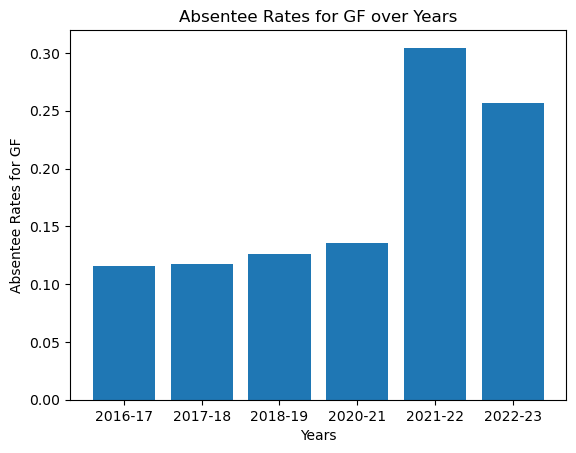

GX


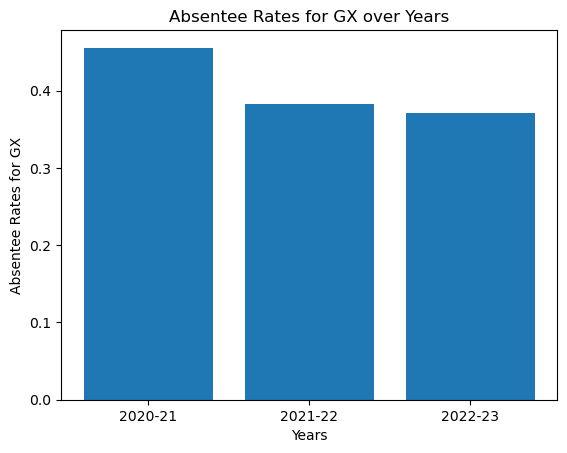

SE


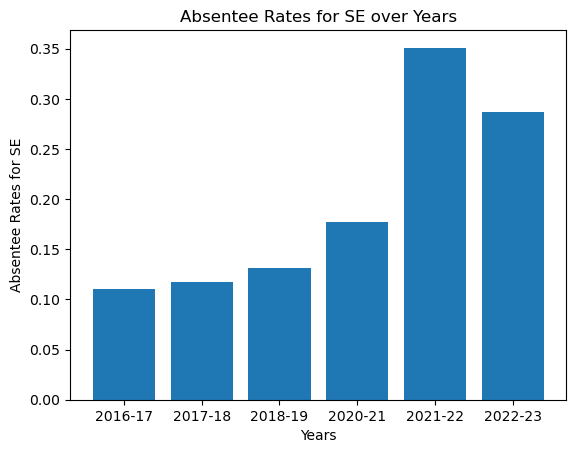

SD


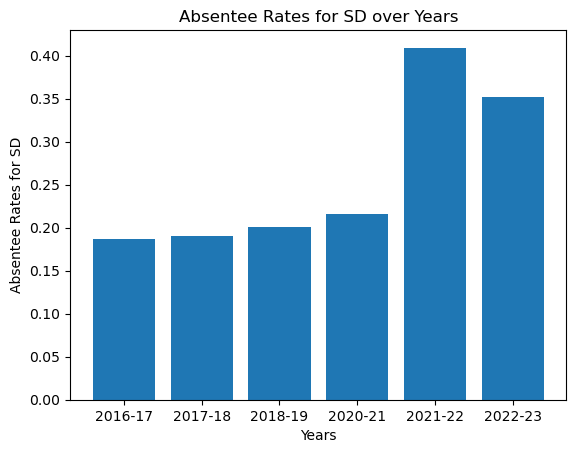

SS


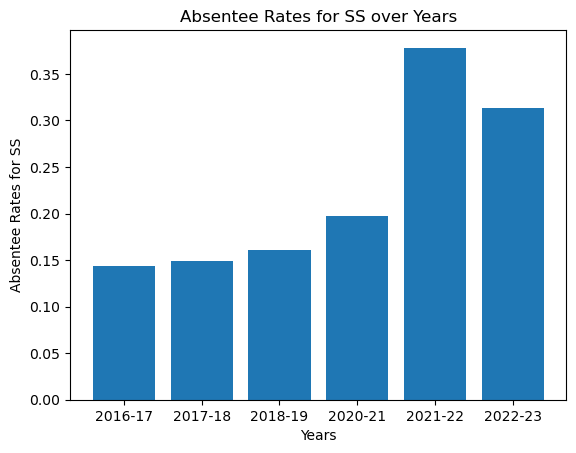

SM


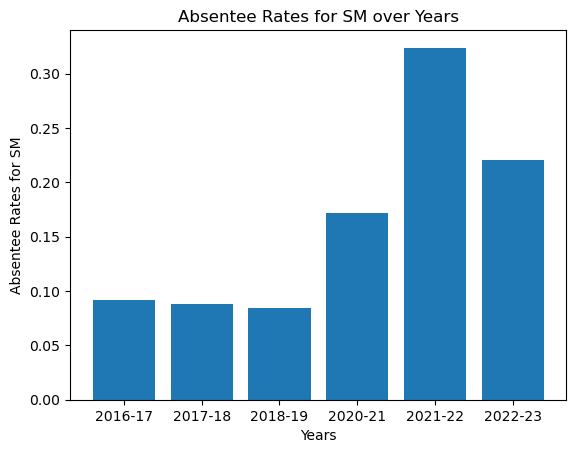

SF


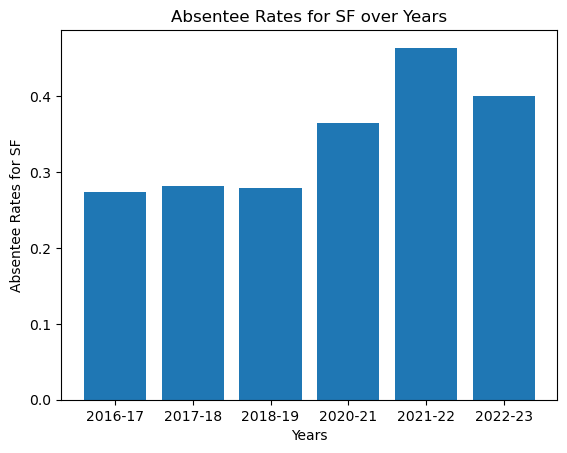

SH


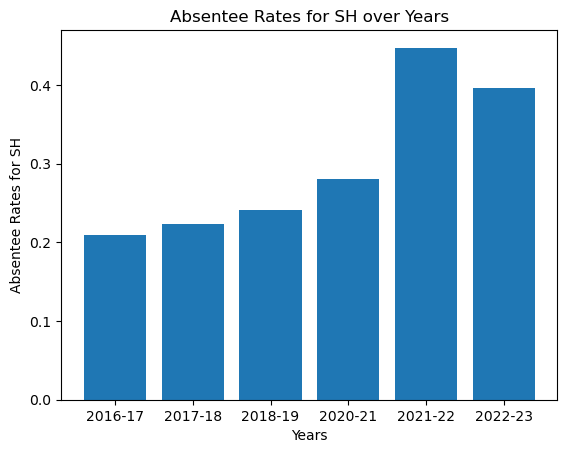

GRKN


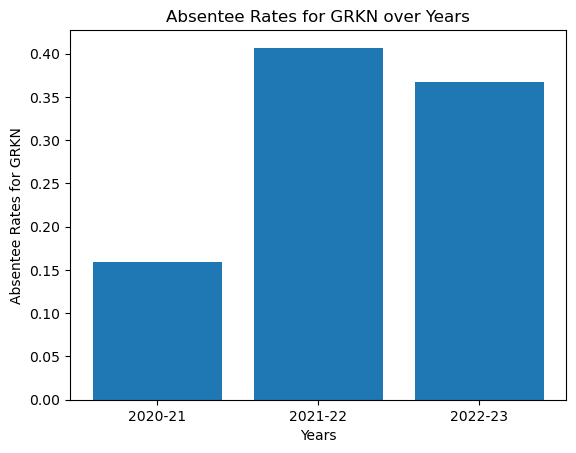

GR13


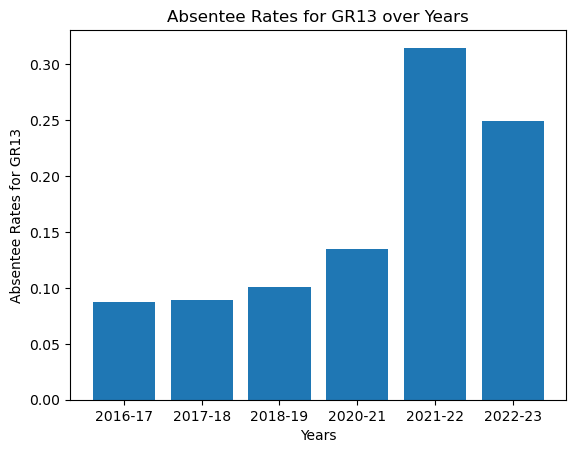

GR46


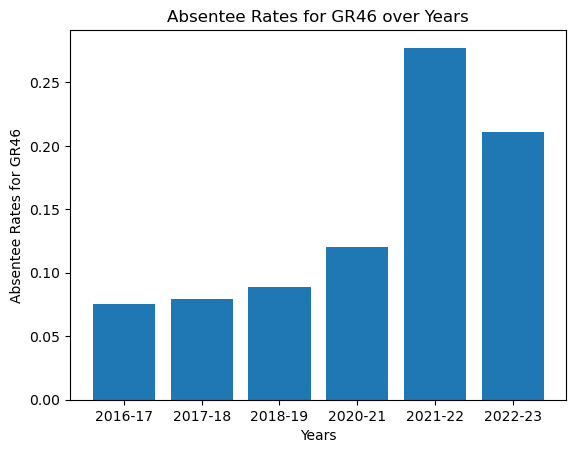

GR78


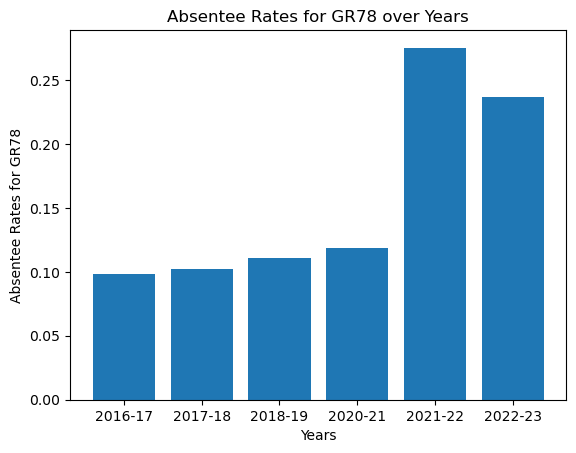

GRK8


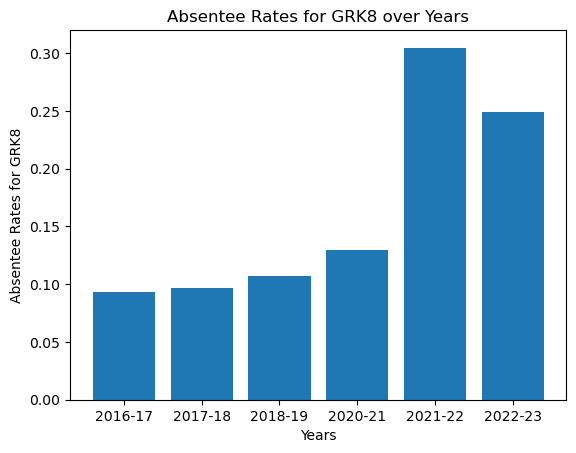

GR912


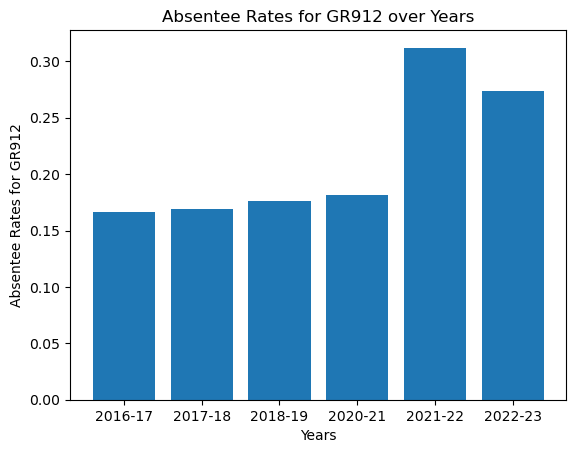

TA


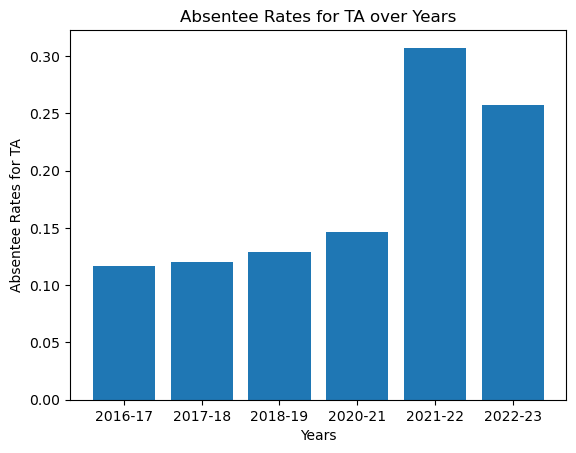

In [103]:
#generalize the code to run this automatically for all age groups at once.
demonum=0
for demo in demographicList:
    print(demo)
    absRates =[]
    yearnum = 0
    
    for year in dfAbsRAW['Academic Year'].unique().tolist():
        
        absRates.append(demoYearArray[yearnum][demonum])
        yearnum += 1
    categories = dfAbsRAW['Academic Year'].unique().tolist()
    values = absRates
    
    plt.bar(categories, values)
    
    plt.xlabel('Years')
    plt.ylabel(f'Absentee Rates for {demo}')
    plt.title(f'Absentee Rates for {demo} over Years')
    plt.savefig(f'Absenteesof{demo}.png')
    
    plt.show()
    

    demonum += 1

C:\Users\matth\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


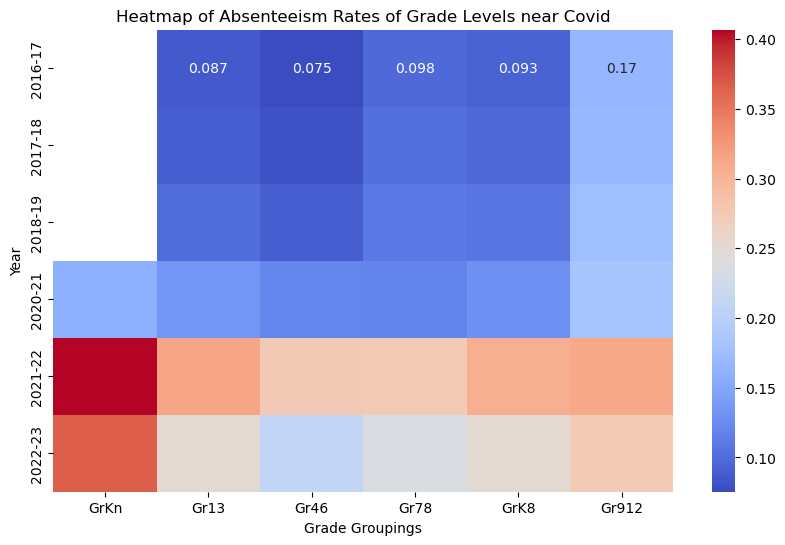

<Figure size 640x480 with 0 Axes>

In [96]:
#TODO Heatmap on absentees of Grades over years
import seaborn as sns

#change array to numpy array
npDemoYearArray = np.array(demoYearArray)
subsetTest = npDemoYearArray[0:6,18:24]
dfDemoYear = pd.DataFrame(subsetTest, columns = ['GrKn', 'Gr13', 'Gr46', 'Gr78', 'GrK8', 'Gr912'])

#corr_matrix = dfDemoYear.pivot_table(index="Year", columns="Grade Group", values="Absentee Rate")
plt.figure(figsize=(10,6))
ylabels = ['2016-17', '2017-18', '2018-19', '2020-21', '2021-22', '2022-23']
sns.heatmap(dfDemoYear, annot=True, cmap="coolwarm", cbar=True, yticklabels=ylabels)

plt.xlabel('Grade Groupings')
plt.ylabel('Year')
plt.title('Heatmap of Absenteeism Rates of Grade Levels near Covid')
plt.show()
plt.savefig('heatmapAbsenteeismGrades.png')
           


In [82]:
print(npDemoYearArray)

[[0.20430011 0.24686983 0.03621034 0.04871652 0.12601176 0.15983269
  0.17440795 0.10563606 0.10378225 0.11785128 0.1153078         nan
  0.11066317 0.18628119 0.14413277 0.09137977 0.2736485  0.20985682
         nan 0.08696254 0.07541983 0.09799054 0.09340688 0.16625456
  0.11671661]
 [0.2162663  0.2327737  0.03911165 0.0510772  0.13040226 0.14068035
  0.1912264  0.10736931 0.10377955 0.1218249  0.11766707        nan
  0.11738291 0.190683   0.14853018 0.08821393 0.28177735 0.22304949
         nan 0.08935715 0.07940391 0.10190689 0.09644448 0.16897144
  0.11989922]
 [0.24026318 0.25093019 0.04357337 0.06171291 0.14239391 0.1266399
  0.23179813 0.1117999  0.10569002 0.13154395 0.1262057         nan
  0.13111312 0.20080407 0.16097004 0.08441051 0.27963712 0.24132193
         nan 0.10047084 0.08878541 0.11085358 0.10696106 0.17575348
  0.12904229]
 [0.27406897 0.32055776 0.03779638 0.0387259  0.1741978  0.13851541
  0.2503585  0.10596788 0.10339831 0.15651851 0.13559882 0.45555556
  0.177

In [83]:

subsetTest = npDemoYearArray[0:6,18:23]
subsetTest

array([[       nan, 0.08696254, 0.07541983, 0.09799054, 0.09340688],
       [       nan, 0.08935715, 0.07940391, 0.10190689, 0.09644448],
       [       nan, 0.10047084, 0.08878541, 0.11085358, 0.10696106],
       [0.15893498, 0.13457348, 0.12020746, 0.11848194, 0.12918299],
       [0.40672571, 0.31470526, 0.27726397, 0.27514427, 0.30471473],
       [0.36752235, 0.24954743, 0.21065348, 0.23641407, 0.24913771]])

In [86]:
dfDemoYear = pd.DataFrame(subsetTest, columns = ['Gr13', 'Gr46', 'Gr78', 'GrK8', 'Gr912'])
dfDemoYear

,Gr13,Gr46,Gr78,GrK8,Gr912
0,NaN,0.086963,0.075420,0.097991,0.093407
1,NaN,0.089357,0.079404,0.101907,0.096444
2,NaN,0.100471,0.088785,0.110854,0.106961
3,0.158935,0.134573,0.120207,0.118482,0.129183
4,0.406726,0.314705,0.277264,0.275144,0.304715
5,0.367522,0.249547,0.210653,0.236414,0.249138
